https://open.oregonstate.education/computationalbiology/chapter/command-line-blast/
    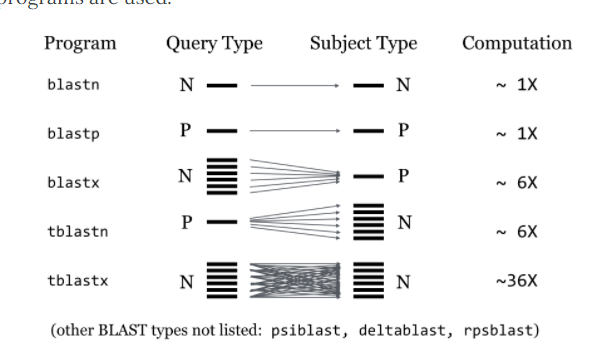

https://blast.ncbi.nlm.nih.gov/Blast.cgi

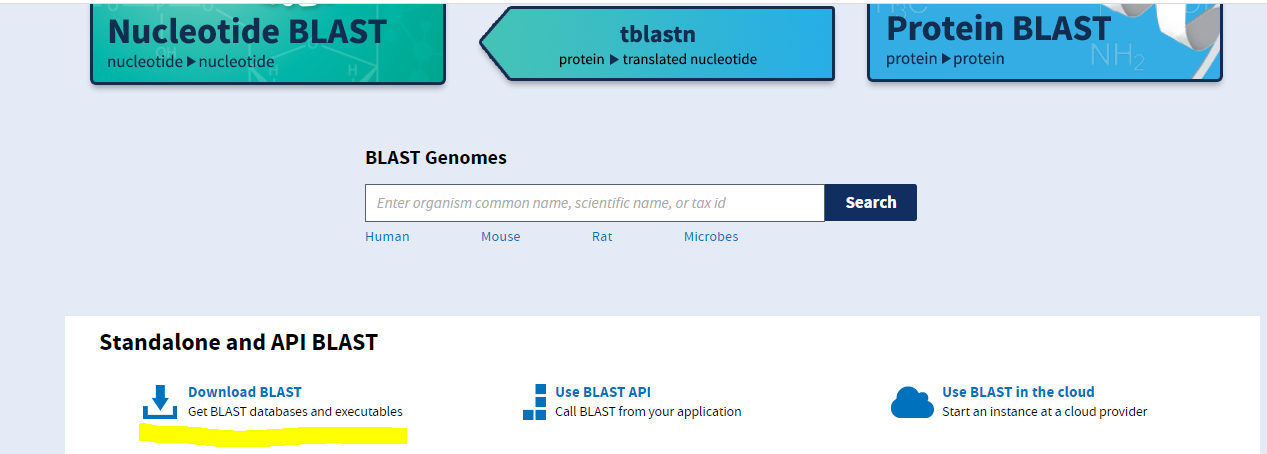


https://ftp.ncbi.nlm.nih.gov/blast/executables/blast+/LATEST/

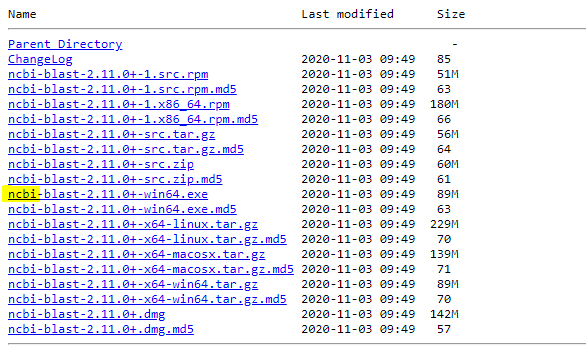

# BLAST en línea de comando

In [8]:
# # Special module for running other programs
# from subprocess import Popen, PIPE, STDOUT

# # Set the blast program and arguements as strings
# blast_prog= "blastp"
# blast_args ='-query query.fasta -db /blastdb/yeast.aa'
# # # The Popen instance runs a program
# proc = Popen(blast_prog + " " + blast_args,
#              stdout=PIPE, stderr=STDOUT, shell=True)

# # # proc.stdout behaves like an open file-handle...
# for l in proc.stdout:
#     print(l)
#     l = l.decode('utf-8').rstrip()
#     if l.startswith('Query='):
#             print('\n'+l+'\n')
#     if l.startswith('gi|'):
#             print(l)


b'BLAST Database error: No alias or index file found for protein database [\\blastdb\\yeast.aa] in search path [C:\\Users\\Eli\\Documents\\Biopython\\Clases\\11Clase_08_12;;]\r\n'


## Hay que darle formato a la base de datos

As we’ve seen, simple FASTA files will suffice for both the query and subject set. It turns out, however, that from a computational perspective, simple FASTA files are not easily searched. Thus BLAST+ provides a tool called makeblastdb that converts a subject FASTA file into an indexed and quickly searchable (but not human-readable) version of the same information, stored in a set of similarly named files (often at least three ending in .pin, .psq, and .phr for protein sequences, and .nin, .nsq, and .nhr for nucleotide sequences). This set of files represents the “database,” and the database name is the shared file name prefix of these files.

A BLAST format databank consists of three binary files (for proteins <basename>.phr <basename>.pin <basename>.psq, for nucleic acids <basename>.nhr <basename>.nin <basename>.nsq).

+ phr header
+ pin index
+ psq sequence

https://www.ncbi.nlm.nih.gov/books/NBK279688/

http://ftp.gen-info.osaka-u.ac.jp/biosoft/blast/documents/formatdb.html
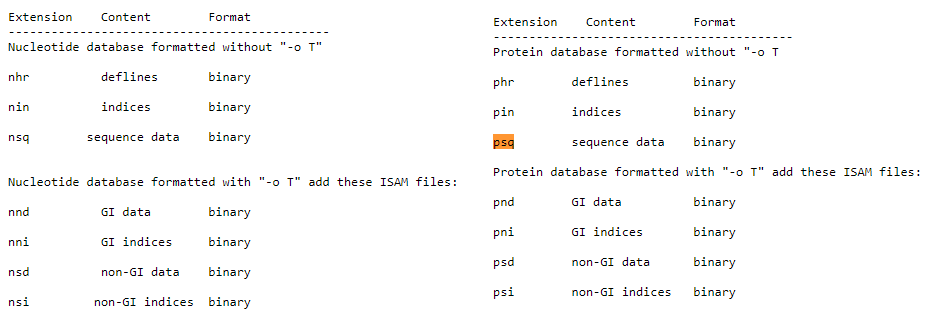

ISAM files: https://www.youtube.com/watch?v=EiW1VVPor10

The **-in** flag states the fasta file to create the database from, the **-title** flag gives the database a title, **-dbtype** says whether it is protein (prot) or nucleotide (nucl), **-out** is the name of the database and **-parse_seqids** states we want to retain the full names of each sequence. 


In [10]:
# # Special module for running other programs
from subprocess import Popen, PIPE, STDOUT

# Set the blast program and arguements as strings
blast_prog= "makeblastdb"
blast_args ='-in ./blastdb/yeast.aa -dbtype prot'
# # The Popen instance runs a program
proc = Popen(blast_prog + " " + blast_args,
             stdout=PIPE, stderr=STDOUT, shell=True)

# # proc.stdout behaves like an open file-handle...
for l in proc.stdout:
    print(l)



b'\r\n'
b'\r\n'
b'Building a new DB, current time: 12/07/2020 15:17:41\r\n'
b'New DB name:   C:\\Users\\Eli\\Documents\\Biopython\\Clases\\11Clase_08_12\\blastdb\\yeast.aa\r\n'
b'New DB title:  ./blastdb/yeast.aa\r\n'
b'Sequence type: Protein\r\n'
b'Keep MBits: T\r\n'
b'Maximum file size: 1000000000B\r\n'
b'Adding sequences from FASTA; added 6298 sequences in 0.211703 seconds.\r\n'
b'\r\n'
b'\r\n'


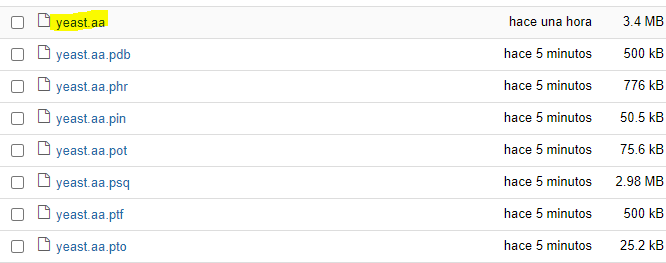

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2696921/

## BLAST

In [16]:
%%bash
head -10 query.fasta

>gi|6319267|ref|NP_009350.1| Yal049cp
MASNQPGKCCFEGVCHDGTPKGRREEIFGLDTYAAGSTSPKEKVIVILTDVYGNKFNNVLLTADKFASAGYMVFVPDILF
GDAISSDKPIDRDAWFQRHSPEVTKKIVDGFMKLLKLEYDPKFIGVVGYCFGAKFAVQHISGDGGLANAAAIAHPSFVSI
EEIEAIDSKKPILISAAEEDHIFPANLRHLTEEKLKDNHATYQLDLFSGVAHGFAARGDISIPAVKYAKEKVLLDQIYWF
NHFSNV
>gi|6319268|ref|NP_009351.1| Yal048cp
MTKETIRVVICGDEGVGKSSLIVSLTKAEFIPTIQDVLPPISIPRDFSSSPTYSPKNTVLIDTSDSDLIALDHELKSADV
IWLVYCDHESYDHVSLFWLPHFRSLGLNIPVILCKNKCDSISNVNANAMVVSENSDDDIDTKVEDEEFIPILMEFKEIDT
CIKTSAKTQFDLNQAFYLCQRAITHPISPLFDAMVGELKPLAVMALKRIFLLSDLNQDSYLDDNEILGLQKKCFNKSIDV
NELNFIKDLLLDISKHDQEYINRKLYVPGKGITKDGFLVLNKIYAERGRHETTWAILRTFHYTDSLCINDKILHPRLVVP


In [13]:
# Special module for running other programs
# from subprocess import Popen, PIPE, STDOUT

# Set the blast program and arguements as strings
blast_prog= "blastp"

#
blast_args ='-query query.fasta -db ./blastdb/yeast.aa'
# # The Popen instance runs a program
proc = Popen(blast_prog + " " + blast_args,
             stdout=PIPE, stderr=STDOUT, shell=True)

# # proc.stdout behaves like an open file-handle...
for l in proc.stdout:
    l = l.decode('utf-8').rstrip()
    if l.startswith('Query='):
            print('\n'+l+'\n')
    if l.startswith('gi|'):
            print(l)

#Score , evalue


Query= gi|6319267|ref|NP_009350.1| Yal049cp

gi|6319267|ref|NP_009350.1| Yal049cp                                  508     0.0
gi|6320123|ref|NP_010203.1| alpha-ketoisocaproate decarboxylase; ...  26.6    4.2
gi|6323814|ref|NP_013885.1| Ymr162cp                                  26.6    4.8
gi|6319657|ref|NP_009739.1| dityrosine transporter MFS-MDR; Dtr1p     26.2    5.0
gi|6320250|ref|NP_010330.1| TFIIS-like small Pol III subunit C11;...  25.4    5.2
gi|6321468|ref|NP_011545.1| Ygr031wp                                  26.2    5.8
gi|6323350|ref|NP_013422.1| 103 kD basic protein, catalytic subun...  26.2    6.1
gi|6324344|ref|NP_014414.1| 23 kDa mitochondrial inner membrane p...  25.4    7.8

Query= gi|6319268|ref|NP_009351.1| Yal048cp

gi|6319268|ref|NP_009351.1| Yal048cp                                  1363    0.0
gi|6324239|ref|NP_014309.1| GTP-binding protein of the rho subfam...  40.0    4e-04
gi|6323642|ref|NP_013713.1| Ypt7p                                     40.0    4e-04
gi

In [45]:
# Special module for running other programs
# from subprocess import Popen, PIPE, STDOUT

# Set the blast program and arguements as strings
blast_prog= "blastp"

#
blast_args ='-query query.fasta -db ./blastdb/yeast.aa'
# # The Popen instance runs a program
proc = Popen(blast_prog + " " + blast_args,
             stdout=PIPE, stderr=STDOUT, shell=True)

q_n=0

#Imprimimos el primer alineamiento de cada query
for l in proc.stdout:
    l = l.decode('utf-8').rstrip()
    
    if l.startswith('Query='):
        q_n+=1
        gi_n=0
        if q_n == 3:
            break
        print('\n'+l+'\n')
    if l.startswith('gi|'):
        print(l)
        
    if l.startswith('>gi|'):    
        gi_n+=1
        if gi_n>=2:
            continue
        print('\n',l)
        
    elif gi_n==1:
        print(l)
    




Query= gi|6319267|ref|NP_009350.1| Yal049cp

gi|6319267|ref|NP_009350.1| Yal049cp                                  508     0.0
gi|6320123|ref|NP_010203.1| alpha-ketoisocaproate decarboxylase; ...  26.6    4.2
gi|6323814|ref|NP_013885.1| Ymr162cp                                  26.6    4.8
gi|6319657|ref|NP_009739.1| dityrosine transporter MFS-MDR; Dtr1p     26.2    5.0
gi|6320250|ref|NP_010330.1| TFIIS-like small Pol III subunit C11;...  25.4    5.2
gi|6321468|ref|NP_011545.1| Ygr031wp                                  26.2    5.8
gi|6323350|ref|NP_013422.1| 103 kD basic protein, catalytic subun...  26.2    6.1
gi|6324344|ref|NP_014414.1| 23 kDa mitochondrial inner membrane p...  25.4    7.8

 >gi|6319267|ref|NP_009350.1| Yal049cp
Length=246

 Score = 508 bits (1307),  Expect = 0.0, Method: Compositional matrix adjust.
 Identities = 246/246 (100%), Positives = 246/246 (100%), Gaps = 0/246 (0%)

Query  1    MASNQPGKCCFEGVCHDGTPKGRREEIFGLDTYAAGSTSPKEKVIVILTDVYGNKFNNVL  60
            MA

##  Output

In [25]:
# Special module for running other programs
from subprocess import Popen, PIPE, STDOUT

# Set the blast program and arguements as strings
blast_prog= "blastp"
blast_args ='-query query.fasta -db ./blastdb/yeast.aa -out results.txt'

# # The Popen instance runs a program
proc = Popen(blast_prog + " " + blast_args,
             stdout=PIPE, stderr=STDOUT, shell=True)

# ¿Por qué esta línea ya no imprime?
for l in proc.stdout:
    l = l.decode('utf-8').rstrip()
    if l.startswith('Query='):
            print('\n'+l+'\n')
    if l.startswith('gi|'):
            print(l)


In [24]:
%%bash 
tail -30 results.txt

                 QQ+  +++  + A + +VN   H+ +R L+  N   I + +   D  KN      
Sbjct  49   -----QQEETRLERSKTALQRYVNKKNHL-TRKLN--NTTRISVKQNLRDQIKNLQSDDI  100

Query  622  ETAAKDVDYRQTAL  635
            E   KD+D  Q+ +
Sbjct  101  ERVLKDIDDIQSRI  114



Lambda      K        H        a         alpha
   0.321    0.137    0.410    0.792     4.96 

Gapped
Lambda      K        H        a         alpha    sigma
   0.267   0.0410    0.140     1.90     42.6     43.6 

Effective search space used: 1341097380


  Database: ./blastdb/yeast.aa
    Posted date:  Dec 7, 2020  3:17 PM
  Number of letters in database: 2,974,038
  Number of sequences in database:  6,298



Matrix: BLOSUM62
Gap Penalties: Existence: 11, Extension: 1
Neighboring words threshold: 11
Window for multiple hits: 40


# Blast Línea de comandos

In [ ]:
# # Alternatively, if we have our query sequence already in a FASTA formatted file, we just need to open the file and read in this record as a string, and use that as the query argument:

# from Bio.Blast import NCBIWWW
# fasta_string = open("./ejercicios_clase/81.fasta").read()
# result_handle = NCBIWWW.qblast("blastn", "nt", fasta_string)
# n=0
# for blast_result in NCBIXML.parse(result_handle):
#     for desc in blast_result.descriptions:
#         if desc.e < 1e-5 and n<5:
#             print('\n****Alignment****')
#             print('sequence:', desc.title)
#             print('e value:', desc.e)
#             n+=1

In [ ]:
from Bio.Blast.Applications import NcbiblastnCommandline
# Set the blast program and arguments as strings
blast_prog   = 'blastn'
#En lugar de blast_args ='-query query.fasta -db ./blastdb/yeast.aa -out results.txt'
blast_query = 'sequence.fasta'
blast_db    = 'nr'

cmdline = NcbiblastnCommandline(cmd=blast_prog,
                                query=blast_query,
                                db=blast_db,
                                outfmt=5,
                                out="results_remote.xml",
                                remote=True)

stdout, stderr = cmdline()

In [1]:
from Bio.Blast import NCBIXML

n=0
result_handle = open("results_remote.xml")
for blast_result in NCBIXML.parse(result_handle):
    for desc in blast_result.descriptions:
        if desc.e < 1e-5 and n<5:
            print('\n****Alignment****')
            print('sequence:', desc.title)
            print('e value:', desc.e)
            n+=1


****Alignment****
sequence: gi|1389679838|ref|XM_016034586.2| PREDICTED: Ziziphus jujuba cold-regulated 413 plasma membrane protein 2-like (LOC107424728), mRNA
e value: 1.16334e-72

****Alignment****
sequence: gi|1227938481|ref|XM_022049453.1| PREDICTED: Carica papaya cold-regulated 413 plasma membrane protein 2-like (LOC110820077), mRNA
e value: 4.2138e-67

****Alignment****
sequence: gi|1389549632|ref|XM_006466626.3| PREDICTED: Citrus sinensis cold-regulated 413 plasma membrane protein 2 (LOC102620025), transcript variant X5, mRNA
e value: 1.17991e-62

****Alignment****
sequence: gi|1389549631|ref|XM_006466625.2| PREDICTED: Citrus sinensis cold-regulated 413 plasma membrane protein 2 (LOC102620025), transcript variant X4, mRNA
e value: 1.17991e-62

****Alignment****
sequence: gi|1389549630|ref|XM_006466624.3| PREDICTED: Citrus sinensis cold-regulated 413 plasma membrane protein 2 (LOC102620025), transcript variant X3, mRNA
e value: 1.17991e-62


In [ ]:
# from Bio.Blast import NCBIWWW


# entrquery = '(Mus musculus [Organism] or Lontra canadensis [Organism])'

# result_handle = NCBIWWW.qblast(program="blastp", database="refseq_protein", sequence="237681125",
#                                entrez_query=entrquery)
# blast_results = result_handle.read()
# print(blast_results)

In [1]:
from Bio.Blast.Applications import NcbiblastnCommandline
# Set the blast program and arguments as strings
blast_prog   = 'blastn'
#En lugar de blast_args ='-query query.fasta -db ./blastdb/yeast.aa -out results.txt'
blast_query = 'sequence.fasta'
blast_db    = 'nr'
entrquery = '(Mus musculus [Organism] or Lontra canadensis [Organism])'


cmdline = NcbiblastnCommandline(cmd=blast_prog,
                                query=blast_query,
                                db=blast_db,
                                outfmt=5,
                                out="results_remote2.xml",
                                entrez_query=entrquery,
                                remote=True)

stdout, stderr = cmdline()

ApplicationError: Non-zero return code 1 from 'blastn -out results_remote2.xml -outfmt 5 -query sequence.fasta -db nr -entrez_query (Mus musculus [Organism] or Lontra canadensis [Organism]) -remote', message 'USAGE'

In [42]:
cmdline

NcbiblastpCommandline(cmd='blastn', out='results_remote2.xml', outfmt=5, query='sequence.fasta', db='nr', entrez_query='(Mus musculus [Organism] or Lontra canadensis [Organism])', remote=True)

In [2]:
# Special module for running other programs
from subprocess import Popen, PIPE, STDOUT

# Set the blast program and arguements as strings
blast_prog= "blastp"
blast_args ='-query sequence_b.fasta -db nr -out results.txt -entrez_query "Mus musculus [Organism]" -remote '

# # The Popen instance runs a program
proc = Popen(blast_prog + " " + blast_args,
             stdout=PIPE, stderr=STDOUT, shell=True)

# ¿Por qué esta línea ya no imprime?
for l in proc.stdout:
    print(l)
    l = l.decode('utf-8').rstrip()
    if l.startswith('Query='):
            print('\n'+l+'\n')
    if l.startswith('gi|'):
            print(l)


In [9]:
%%bash 
awk 'FNR>=20 && FNR<=40' results.txt

excluding environmental samples from WGS projects
           329,842,749 sequences; 119,320,038,135 total letters



Query= NP_009230.2 breast cancer type 1 susceptibility protein isoform 5
[Homo sapiens]

Length=699

RID: WZDEVZF4016
                                                                      Score     E
Sequences producing significant alignments:                          (Bits)  Value

XP_006532131.1 breast cancer type 1 susceptibility protein homolo...  713     0.0   
XP_036012146.1 breast cancer type 1 susceptibility protein homolo...  421     9e-129
XP_006532127.1 breast cancer type 1 susceptibility protein homolo...  420     1e-128
AAA96393.1 breast/ovarian cancer susceptibility protein homolog [...  420     2e-128
AAD00168.1 Brca1 [Mus musculus]                                       420     2e-128
AAB17114.1 breast/ovarian cancer susceptibility homolog [Mus musc...  420     2e-128
EDL34053.1 breast cancer 1 [Mus musculus]                             420     2e-128


## XML

In [ ]:
# Special modules for running blast
from Bio.Blast.Applications import NcbiblastpCommandline

# Set the blast program and arguments as strings
blast_prog   = 'blastp'
#En lugar de blast_args ='-query query.fasta -db ./blastdb/yeast.aa -out results.txt'
blast_query = 'query.fasta'
blast_db    = 'blastdb/yeast.aa'

# Build the command-line
cmdline = NcbiblastpCommandline(cmd=blast_prog,
                                query=blast_query,
                                db=blast_db,
                                outfmt=5,
                                out="results.xml")
                                # ...and execute.
stdout, stderr = cmdline()

In [68]:
%%bash
awk 'FNR>=20 && FNR<=40' results.xml

<BlastOutput_iterations>
<Iteration>
  <Iteration_iter-num>1</Iteration_iter-num>
  <Iteration_query-ID>Query_1</Iteration_query-ID>
  <Iteration_query-def>gi|6319267|ref|NP_009350.1| Yal049cp</Iteration_query-def>
  <Iteration_query-len>246</Iteration_query-len>
<Iteration_hits>
<Hit>
  <Hit_num>1</Hit_num>
  <Hit_id>gnl|BL_ORD_ID|48</Hit_id>
  <Hit_def>gi|6319267|ref|NP_009350.1| Yal049cp</Hit_def>
  <Hit_accession>48</Hit_accession>
  <Hit_len>246</Hit_len>
  <Hit_hsps>
    <Hsp>
      <Hsp_num>1</Hsp_num>
      <Hsp_bit-score>508.064</Hsp_bit-score>
      <Hsp_score>1307</Hsp_score>
      <Hsp_evalue>0</Hsp_evalue>
      <Hsp_query-from>1</Hsp_query-from>
      <Hsp_query-to>246</Hsp_query-to>


###  ElementTree

In [47]:
# Parse the results by opening the output file
from xml.etree import ElementTree as ET
result = open("results.xml")
doc = ET.parse(result)
root = doc.getroot()
for ele in root.getiterator('Iteration'):
    queryid = ele.findtext('Iteration_query-def')
    for hit in ele.getiterator('Hit'):
        hitid = hit.findtext('Hit_id')
        for hsp in hit.getiterator('Hsp'):
            evalue = hsp.findtext('Hsp_evalue')
            print('\t'.join([queryid,hitid,evalue]))
            break

gi|6319267|ref|NP_009350.1| Yal049cp	gnl|BL_ORD_ID|48	0
gi|6319267|ref|NP_009350.1| Yal049cp	gnl|BL_ORD_ID|904	4.15276
gi|6319267|ref|NP_009350.1| Yal049cp	gnl|BL_ORD_ID|4632	4.79148
gi|6319267|ref|NP_009350.1| Yal049cp	gnl|BL_ORD_ID|439	4.99578
gi|6319267|ref|NP_009350.1| Yal049cp	gnl|BL_ORD_ID|1033	5.20718
gi|6319267|ref|NP_009350.1| Yal049cp	gnl|BL_ORD_ID|2269	5.84281
gi|6319267|ref|NP_009350.1| Yal049cp	gnl|BL_ORD_ID|4164	6.14351
gi|6319267|ref|NP_009350.1| Yal049cp	gnl|BL_ORD_ID|5164	7.75184
gi|6319268|ref|NP_009351.1| Yal048cp	gnl|BL_ORD_ID|49	0
gi|6319268|ref|NP_009351.1| Yal048cp	gnl|BL_ORD_ID|5058	0.000359058
gi|6319268|ref|NP_009351.1| Yal048cp	gnl|BL_ORD_ID|4459	0.000413859
gi|6319268|ref|NP_009351.1| Yal048cp	gnl|BL_ORD_ID|4072	0.000823752
gi|6319268|ref|NP_009351.1| Yal048cp	gnl|BL_ORD_ID|5497	0.000913077
gi|6319268|ref|NP_009351.1| Yal048cp	gnl|BL_ORD_ID|6258	0.00113914
gi|6319268|ref|NP_009351.1| Yal048cp	gnl|BL_ORD_ID|1869	0.00143794
gi|6319268|ref|NP_009351.1| Yal048cp

###  NCBIXML

In [53]:
from Bio.Blast import NCBIXML

result_handle = open("results.xml")
for blast_result in NCBIXML.parse(result_handle):
    for alignment in blast_result.alignments:
        for hsp in alignment.hsps:
            if hsp.expect < 1e-5:
                print('\n****Alignment****')
                print('sequence:', alignment.title)
                print('sequence:', a)
                print('length:', alignment.length)
                print('e value:', hsp.expect)
                print(hsp.query[0:75] + '...')
                print(hsp.match[0:75] + '...')
                print(hsp.sbjct[0:75] + '...')



****Alignment****
sequence: gnl|BL_ORD_ID|48 gi|6319267|ref|NP_009350.1| Yal049cp
length: 246
e value: 0.0
MASNQPGKCCFEGVCHDGTPKGRREEIFGLDTYAAGSTSPKEKVIVILTDVYGNKFNNVLLTADKFASAGYMVFV...
MASNQPGKCCFEGVCHDGTPKGRREEIFGLDTYAAGSTSPKEKVIVILTDVYGNKFNNVLLTADKFASAGYMVFV...
MASNQPGKCCFEGVCHDGTPKGRREEIFGLDTYAAGSTSPKEKVIVILTDVYGNKFNNVLLTADKFASAGYMVFV...

****Alignment****
sequence: gnl|BL_ORD_ID|49 gi|6319268|ref|NP_009351.1| Yal048cp
length: 662
e value: 0.0
MTKETIRVVICGDEGVGKSSLIVSLTKAEFIPTIQDVLPPISIPRDFSSSPTYSPKNTVLIDTSDSDLIALDHEL...
MTKETIRVVICGDEGVGKSSLIVSLTKAEFIPTIQDVLPPISIPRDFSSSPTYSPKNTVLIDTSDSDLIALDHEL...
MTKETIRVVICGDEGVGKSSLIVSLTKAEFIPTIQDVLPPISIPRDFSSSPTYSPKNTVLIDTSDSDLIALDHEL...


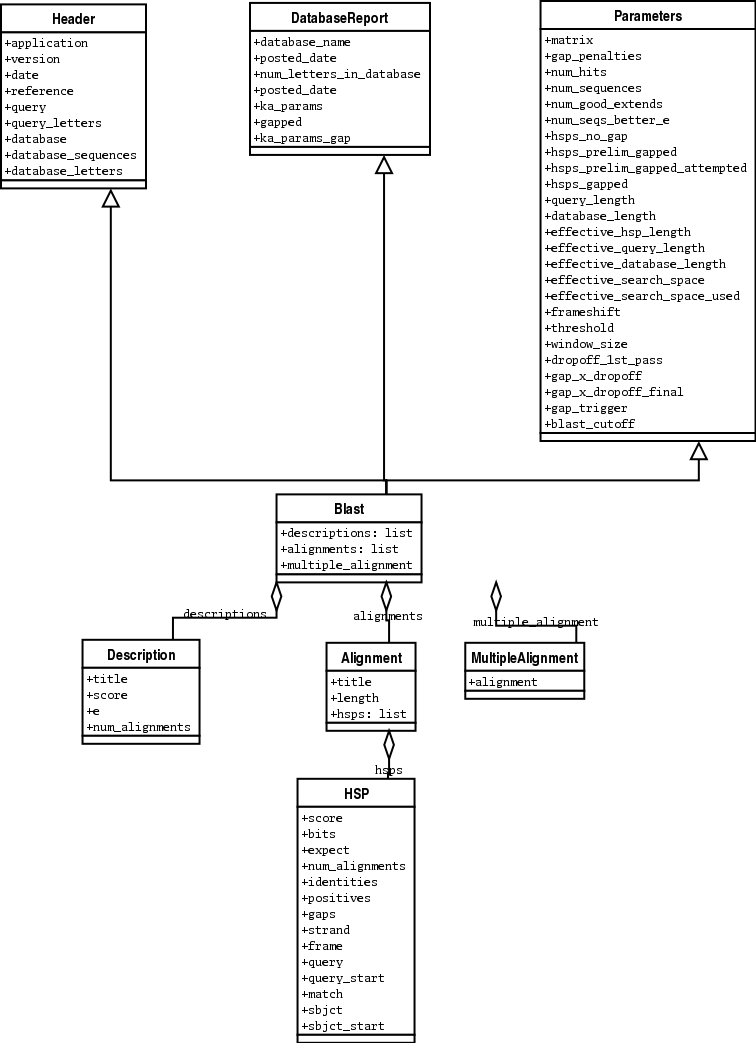


## Tipo de id

https://ncbi.github.io/cxx-toolkit/pages/ch_demo#ch_demo.T5

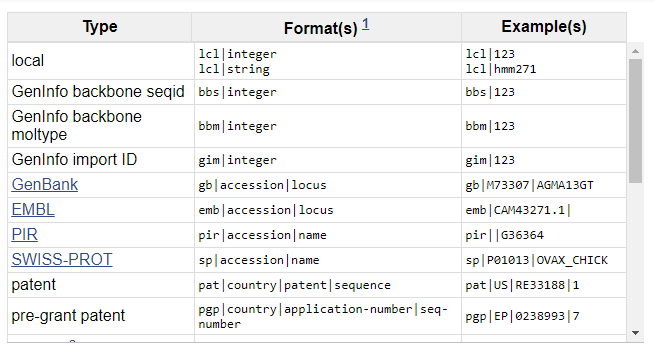

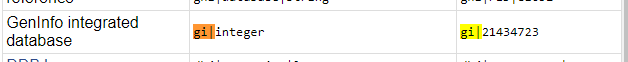

In [ ]:
https://scicomp.ethz.ch/public/manual/BLAST/BLAST.pdf

# Ejercicio 


I know that my protein (epidermal growth factor receptor – Accession Number 1007208A) has a tyrosine kinase domain. Does it have other conserved domains? Are there other proteins that also share these domains?

1. Utilizando el accession ID y Entrez.efetch, desde la base de datos de **proteína** obtén la secuencia en fasta.

In [22]:
from Bio import Entrez, SeqIO
Entrez.email = ______     

handle = ______.______(db=______, id=______, rettype=______, retmode=______)
record = ______.______(handle, ______)
handle.close()


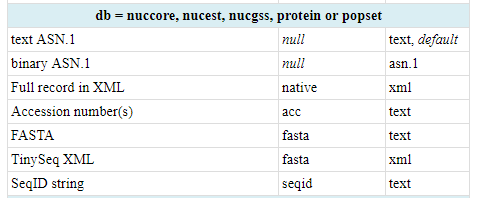

2.- También quiero conocer un poco más sobre el artículo en pubmed id, la cual vendría en un **archivo full record** (podemos leer los xml con ElementTree)

In [71]:
handle = ______.______(db=______, id=______, rettype=______, retmode=______)
prot_xml = handle.read().decode()

from xml.etree import ElementTree as ET


tree = ET.ElementTree(ET.fromstring(prot_xml))
root = tree.getroot()

# Aquí estamos buscando el PubMedId, un ejemplo de búsqueda con el MedlineUID:

muid = root.find(".//MedlineUID")
muid.txt
#'84245835'

pmid = root.find(________)

In [83]:
#https://www.ncbi.nlm.nih.gov/books/NBK25499/table/chapter4.T._valid_values_of__retmode_and/?report=objectonly

3.- Obtengan el abstract de pubmed (link de a rettype y retmode https://www.ncbi.nlm.nih.gov/books/NBK25499/table/chapter4.T._valid_values_of__retmode_and/?report=objectonly) e imprímanlo

In [80]:
handle = ________.________(db=________, id=________, rettype=________, retmode=________)
abst_prot = handle.read()

In [82]:
print(abst_prot.replace(________,________))


1. Nature. 1984 Jun 28-Jul 4;309(5971):806-10.

Human epidermal growth factor receptor cDNA is homologous to a variety of RNAs
overproduced in A431 carcinoma cells.

Xu YH, Ishii S, Clark AJ, Sullivan M, Wilson RK, Ma DP, Roe BA, Merlino GT,
Pastan I.

The recently discovered similarity between the human epidermal growth factor
(EGF) receptor and the avian erythroblastosis virus v-erb-B protein supports the 
hypothesis that viral oncogenes share a common evolutionary origin with genes
encoding growth-regulating cell-surface receptors. To elucidate the relationship 
between receptors and malignant transformation, we have now used a fragment of
v-erb-B as a probe to screen a cDNA library of mRNA from A431 human carcinoma
cells, which possess a large number of EGF receptors. Of the six clones isolated,
the largest (pE7) contains an insert of 2.4 kilobase pairs (kbp) whose deduced
amino acid sequence is homologous to the v-erb-B protein and identical to
reported EGF receptor peptide seque

El archivo 'WY43P12A016-Alignment.xml' es una selección de organismos de un blast de proteínas con la base de datos noredundante 

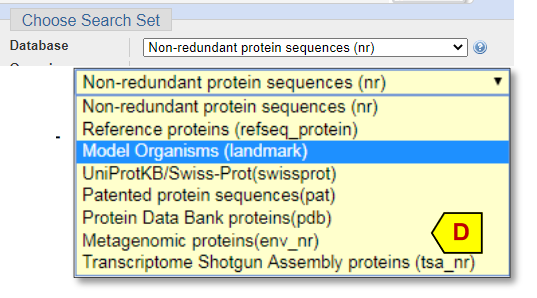

4.- Lean el archivo utilizando SearchIO

In [95]:
from Bio import ________
blast_qresult = ________.________('WY43P12A016-Alignment.xml', ________)
print(blast_qresult)

Program: blastp (2.11.0+)
  Query: prf||1007208A (797)
         epidermal growth factor receptor [Homo sapiens]
 Target: nr
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  ref|XP_034820018.1|  epidermal growth factor receptor i...
            1      1  ref|XP_010585451.1|  epidermal growth factor receptor i...
            2      2  ref|XP_036850842.1|  epidermal growth factor receptor i...
            3      1  ref|XP_032160785.1|  epidermal growth factor receptor [...
            4      1  ref|XP_021066267.1|  epidermal growth factor receptor [...


5.- Filtren los resultados de manera que sólo queden aquellos hits que tienen 1 HSP

In [125]:
filter_func = lambda ________: ________
filtered_qresult = blast_qresult.________(________)
len(filtered_qresult)

4

6.- Creen un fasta con todas las secuencias de los **hits**. Cada secuencia del fasta debe tener como id el **hit id**

In [252]:
# Recuerda usar la secuencia de hsp.hit, no directamente la de hsp ya que esa tiene el alineamiento y no queremos los gaps
secuencias = ________
for hit in filtered_qresult:
    for hsp in hit:
        ________
        ________
        ________

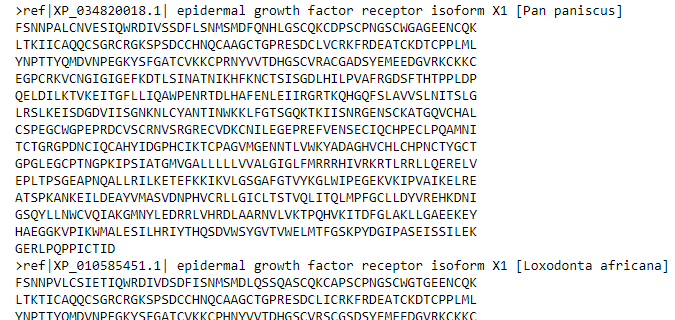

7.- Ahora que tienen los organismos de los cuales filtré el fasta. ¿Cómo habrían hecho la búsqueda específica de blast para ellos?

In [ ]:
#No lo corran
result_handle = NCBIWWW.qblast(________)


8.- Para analizar los dominios utilizaremos ScanProsite, el input debe ser el fasta obtenido

In [198]:
from Bio.ExPASy import ScanProsite
handle = ________.________(secuencias)
results = ________.________(________)

Obtengan los Prosite únicos que se encontraron (lo que nos interesa es el "PSXXXXX")

In [200]:
from Bio import ExPASy
from Bio.ExPASy import Prosite

PS_files = ________
________
________
________


In [225]:
PS_files

['PS50011', 'PS00107', 'PS00109']

Impriman la descripción de los Prosites y también guarden la documentación de cada uno. Si la documentación se repite, solo guarden un valor

In [251]:
from Bio import ExPASy
from Bio.ExPASy import Prodoc

PDOCs=________
________
________
________

Protein kinase domain profile.
Protein kinases ATP-binding region signature.
Tyrosine protein kinases specific active-site signature.


In [243]:
PDOC

'PDOC00100'

In [ ]:
Impriman el texto

In [5]:
# from Bio import ExPASy
# from Bio.ExPASy import Prodoc

________
________
print(________)

******************************************
* Protein kinases signatures and profile *
******************************************

Eukaryotic  protein kinases [1 to 5]  are  enzymes  that   belong  to  a  very
extensive family of  proteins which share a conserved catalytic core common to
both serine/threonine and  tyrosine protein kinases.  There  are  a  number of
conserved regions in the catalytic domain of protein kinases. We have selected
two of these regions to build signature patterns.  The  first region, which is
located in the N-terminal extremity of the catalytic domain, is a glycine-rich
stretch of residues in the vicinity  of a lysine residue, which has been shown
to be involved in ATP binding.   The second  region,  which is  located in the
central part of the  catalytic  domain,  contains  a  conserved  aspartic acid
residue  which is important for the catalytic activity  of  the enzyme [6]; we
have derived  two signature patterns for that region: one specific for serine/
t